In [21]:
import matplotlib.pyplot as plt
import pywt
import cv2
import numpy as np
from pywt._doc_utils import draw_2d_wp_basis, wavedec2_keys

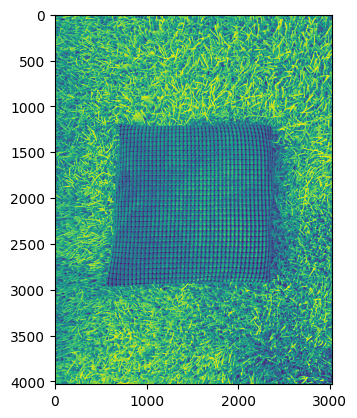

In [27]:
image = cv2.imread("samples/IMG_0425.jpg")
# image = cv2.resize(image, (300,400)) 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.uint8)

image_size = gray_image.shape
plt.imshow(gray_image)
plt.show()

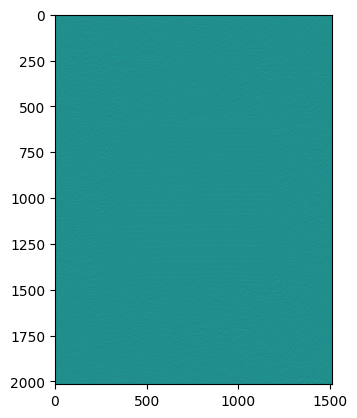

In [28]:
plt.imshow(pywt.dwt2(gray_image, "haar")[1][0])

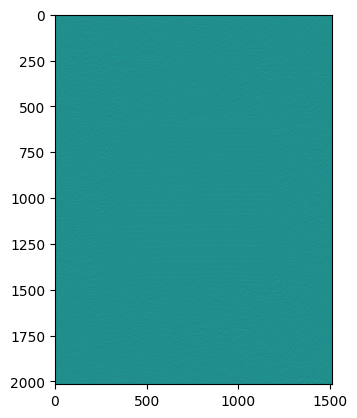

In [29]:
plt.imshow(pywt.WaveletPacket2D(gray_image, "haar").get_level(1)[1].data)

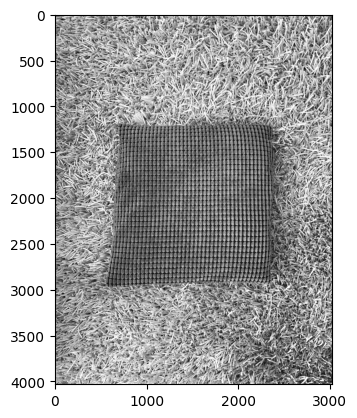

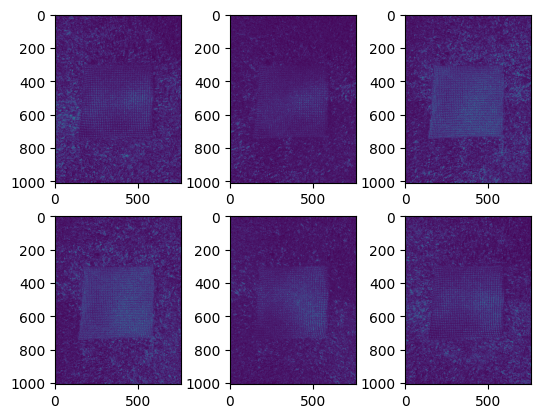

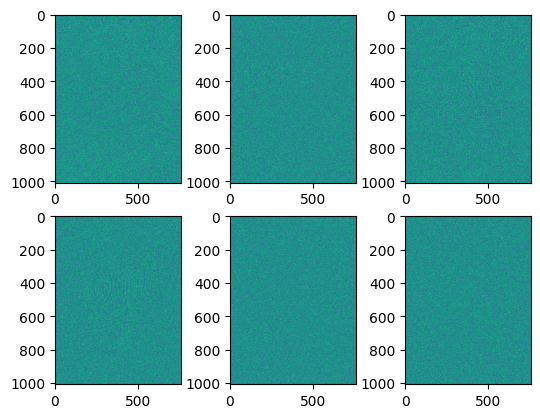

In [30]:
plt.figure(1)
plt.imshow(gray_image, cmap="gray")

import dtcwt
transform = dtcwt.Transform2d()

# Compute two levels of dtcwt with the defaul wavelet family
mandrill_t = transform.forward(gray_image, nlevels=2)

# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0.
plt.figure(2)
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(mandrill_t.highpasses[1][:,:,slice_idx]))

# Show the phase images for each direction in level 2.
plt.figure(3)
for slice_idx in range(mandrill_t.highpasses[1].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(mandrill_t.highpasses[1][:,:,slice_idx]))

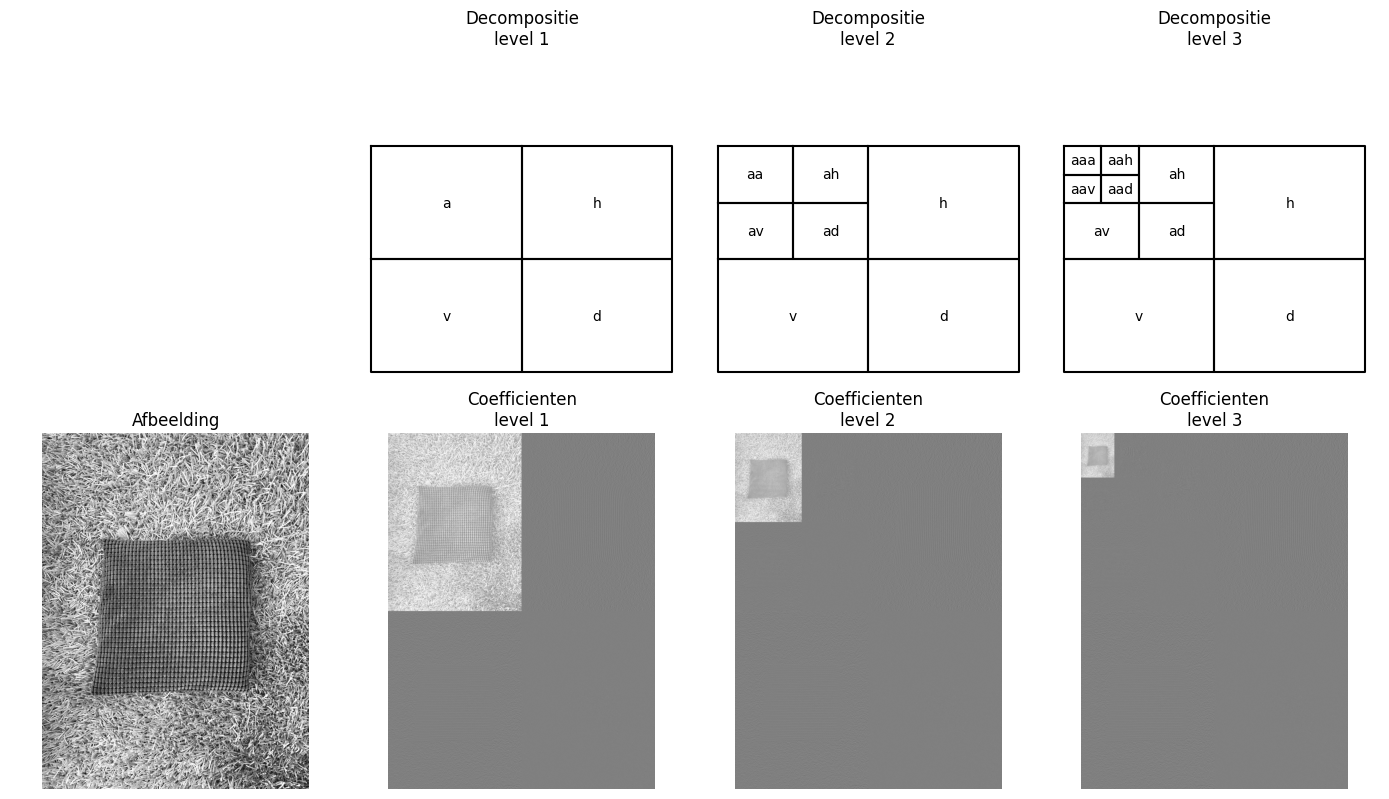

In [31]:
x = gray_image
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Afbeelding')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title(f'Decompositie\nlevel {level}')

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'haar', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title(f'Coefficienten\nlevel {level}')
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()